
 #### User Story 5 : Classification supervisée et évaluation des modèles



**Définir la variable cible y à partir de la colonne Cluster**




In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

df=pd.read_csv("../data/classified/data_cleabed_standardized_clustred_classified.csv")
print(df.head())
y = df["Cluster"]
print(y.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.224686  0.476416 -1.342096   
3    -0.802604 -1.071021      -0.526828      -0.670369 -0.525808 -0.634765   
4    -1.703581  0.504932      -2.680676       0.666679  0.446709  1.575641   

   DiabetesPedigreeFunction       Age  Cluster  risk_category  
0                  0.612059  1.437767        0  risque_faible  
1                 -0.324994 -0.050575        1   risque_eleve  
2                  0.749586  0.047687        0  risque_faible  
3                 -1.063014 -1.247065        1   risque_eleve  
4                  4.158488  0.143015        0  risque_faible  
0    0
1    1
2    0
3    1
4    0
Name: Cluster, dtype: int64


**Définir X à partir des variables sélectionnées**

In [17]:
X = df.drop(columns=["Cluster", "risk_category"])
print(X.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.224686  0.476416 -1.342096   
3    -0.802604 -1.071021      -0.526828      -0.670369 -0.525808 -0.634765   
4    -1.703581  0.504932      -2.680676       0.666679  0.446709  1.575641   

   DiabetesPedigreeFunction       Age  
0                  0.612059  1.437767  
1                 -0.324994 -0.050575  
2                  0.749586  0.047687  
3                 -1.063014 -1.247065  
4                  4.158488  0.143015  


**Diviser les données en ensemble d’entraînement et de test à l’aide de traintestsplit**


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Répartition des classes dans le train :")
print(y_train.value_counts(normalize=True))
print(X_train.value_counts(normalize=True))

Répartition des classes dans le train :
Cluster
0    0.542345
1    0.457655
Name: proportion, dtype: float64
Pregnancies  Glucose    BloodPressure  SkinThickness  Insulin    BMI        DiabetesPedigreeFunction  Age      
-1.703581    -2.121657  -1.023870       0.252831      -0.538550  -1.577872   0.936030                  2.356409    0.001629
             -1.596339  -1.355231      -1.195637      -1.585523  -1.666288  -0.358687                 -0.713619    0.001629
             -1.235183  -0.692509      -0.781789      -1.115347   0.499910   0.351378                 -1.247065    0.001629
                         0.798617       0.220997      -0.049014   0.853575  -0.785699                 -0.969216    0.001629
             -1.169518  -0.361147       0.332417      -0.245719   0.499910  -0.765299                 -0.713619    0.001629
                                                                                                                     ...   
 1.726759     1.030249   1.295659  

**Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage ou sous-échantillonnage (RandomOverSampler, UnderSampler via imblearn)**


Le rapport est environ 417 / 351 ≈ 1.18,
donc les deux classes sont presque équilibrées.

En général, on parle de déséquilibre si une classe est au moins 2 à 3 fois plus fréquente que l’autre

**Tester les algorithmes suivants : Random Forest, SVM, Gradient Boosting, Decision Tree, Régression Logistique , XGB.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1_sc=f1_score(y_test,y_pred, average="weighted")
print(f" Accuracy : {acc:.3f}")
print(f" F1-score : {f1_sc:.3f}")
print(classification_report(y_test, y_pred))

# models=["RandomForestClassifier","GradientBoostingClassifier","DecisionTreeClassifier","LogisticRegression","SVC","XGBClassifier"]



✅ Accuracy : 0.961
✅ F1-score : 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.97      0.94      0.96        70

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



 Résultats pour Random Forest
→ Accuracy : 0.942
→ F1-score : 0.941
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        84
           1       0.96      0.91      0.93        70

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



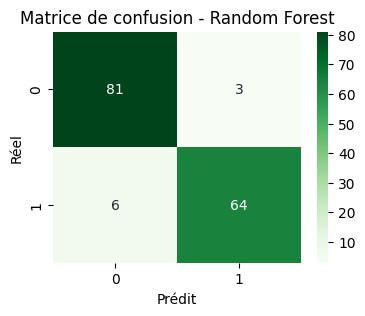

Random Forest: moyenne = 0.946, écart-type = 0.013
 Résultats pour Gradient Boosting
→ Accuracy : 0.948
→ F1-score : 0.948
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        84
           1       0.96      0.93      0.94        70

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



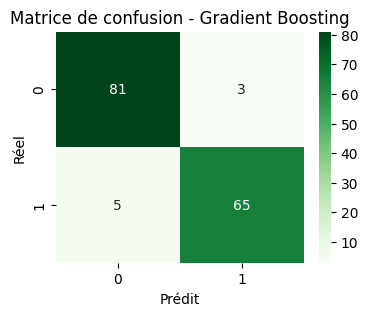

Gradient Boosting: moyenne = 0.943, écart-type = 0.016
 Résultats pour Logistic Regression
→ Accuracy : 1.000
→ F1-score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        70

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



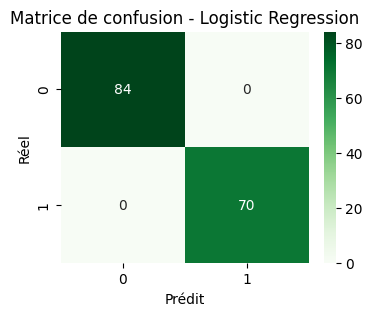

Logistic Regression: moyenne = 0.993, écart-type = 0.006
 Résultats pour Decision Tree
→ Accuracy : 0.896
→ F1-score : 0.896
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        84
           1       0.89      0.89      0.89        70

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



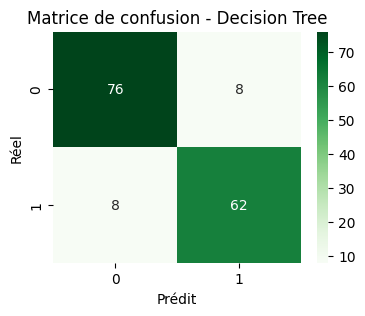

Decision Tree: moyenne = 0.870, écart-type = 0.013
 Résultats pour SVC
→ Accuracy : 0.961
→ F1-score : 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.97      0.94      0.96        70

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



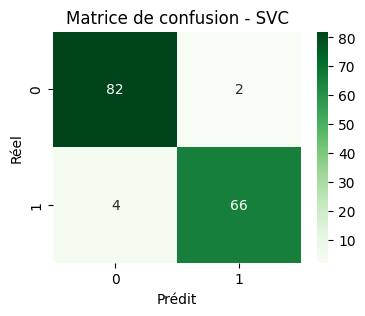

SVC: moyenne = 0.966, écart-type = 0.017
 Résultats pour XGBoost
→ Accuracy : 0.961
→ F1-score : 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.97      0.94      0.96        70

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


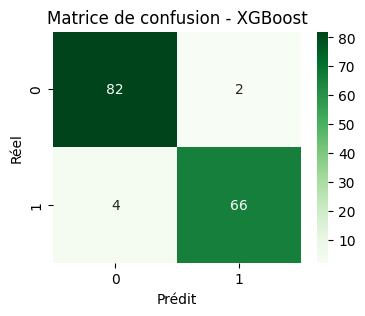

c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:02] WARNING: C:\actio

XGBoost: moyenne = 0.932, écart-type = 0.021


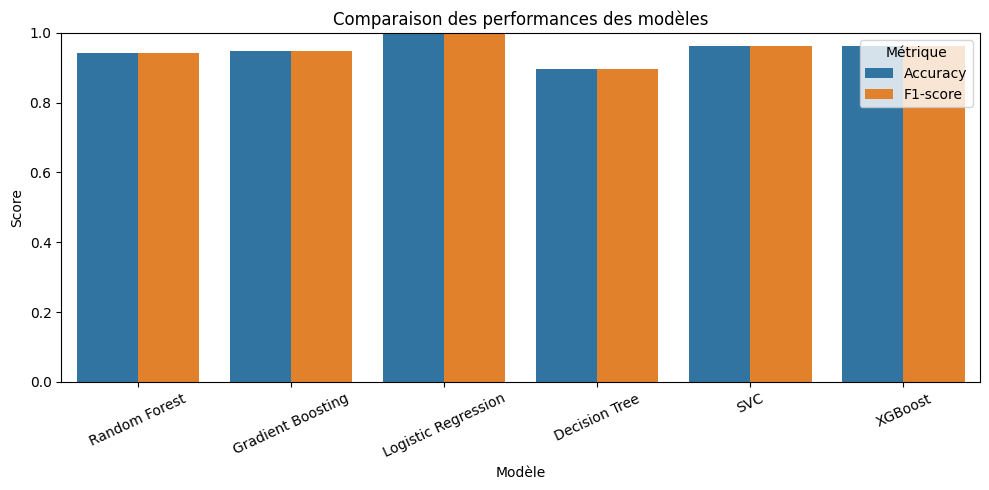

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
results=[]
def entrainer_models(model_class, X_train, X_test, y_train, y_test, model_name, **kwargs):
    model = model_class(**kwargs)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred, average="weighted")

    print("="*60)
    print(f" Résultats pour {model_name}")
    print("="*60)

    print(f"→ Accuracy : {acc:.3f}")
    print(f"→ F1-score : {f1_sc:.3f}")
    print(classification_report(y_test, y_pred))

    results.append({
        "Modèle": model_name,
        "Accuracy": acc,
        "F1-score": f1_sc
    })
    print("="*60)

    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()
    print("="*60)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: moyenne = {scores.mean():.3f}, écart-type = {scores.std():.3f}")

    return model



entrainer_models(RandomForestClassifier, X_train, X_test, y_train, y_test, "Random Forest",random_state=42)
entrainer_models(GradientBoostingClassifier, X_train, X_test, y_train, y_test, "Gradient Boosting",random_state=42)
entrainer_models(LogisticRegression, X_train, X_test, y_train, y_test, "Logistic Regression",max_iter=1000)
entrainer_models(DecisionTreeClassifier, X_train, X_test, y_train, y_test, "Decision Tree",random_state=42)
entrainer_models(SVC, X_train, X_test, y_train, y_test, "SVC", probability=True)
entrainer_models(XGBClassifier, X_train, X_test, y_train, y_test, "XGBoost", use_label_encoder=False, eval_metric='logloss')

print("="*60)

results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score"),
            x="Modèle", y="Score", hue="Métrique")
plt.title("Comparaison des performances des modèles")
plt.xticks(rotation=25)
plt.ylim(0, 1)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()
print("="*60)
